In [201]:
from google.colab import files


uploaded = files.upload()

Saving dataset.csv to dataset (1).csv


In [362]:
import pandas as pd
import io

dataset_one = pd.read_csv(io.BytesIO(uploaded['dataset (1).csv']))
print(dataset_one)

                verifiedby                     country  class  \
0           La Silla Vacía                    Colombia  FALSE   
1               Newtral.es                       Spain  FALSE   
2            FactCrescendo                       India  False   
3      France 24 Observers                      France  False   
4             Agência Lupa                      Brazil  False   
...                    ...                         ...    ...   
6897                Misbar   Middle East, North Africa  False   
6898                 Teyit                      Turkey  False   
6899           LeadStories               United States  FALSE   
6900             Full Fact              United Kingdom  FALSE   
6901               Rappler                 Philippines  False   

                                                  title published_date  \
0      The coronavirus is an amplified bacteria rela...    2020/06/17    
1      A law allows people to go for a run during th...    2020/04/09  

## Import Modules

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')


pandas - used to perform data manipulation and analysis

numpy - used to perform a wide variety of mathematical operations on arrays

matplotlib - used for data visualization and graphical plotting

seaborn - built on top of matplotlib with similar functionalities

re – used as a regular expression to find particular patterns and process it

nltk –  a natural language processing toolkit module

warnings - to manipulate warnings details

%matplotlib inline - to enable the inline plotting

filterwarnings('ignore') is to ignore the warnings thrown by the modules (gives clean results)






## Loading the Dataset

In [364]:
#create a copy of the original dataset to work on and retain the original dataset
df = dataset_one.copy()

In [365]:
df.head()

,verifiedby,country,class,title,published_date,country1,country2,country3,country4,article_source,ref_source,source_title,content_text,category,lang
0,La Silla Vacía,Colombia,FALSE,The coronavirus is an amplified bacteria rela...,2020/06/17,Colombia,NaN,NaN,NaN,https://lasillavacia.com/detector-video-falso-...,poynter,Detector a video falso que dice que el Covid e...,La Silla Vacía usa Cookies para mejorar la exp...,NaN,es
1,Newtral.es,Spain,FALSE,A law allows people to go for a run during th...,2020/04/09,Spain,NaN,NaN,NaN,https://www.newtral.es/la-broma-de-que-a-los-r...,poynter,La broma de que a los “runners” se les permite...,En los últimos días nos ha llegado una consult...,NaN,es
2,FactCrescendo,India,False,Chinese converting to Islam after realizing t...,2020/02/20,India,NaN,NaN,NaN,https://english.factcrescendo.com/2020/02/20/c...,poynter,Are Chinese people converting to Islam in fear...,"The fact behind every news!, Ever since the Wo...",NaN,en
3,France 24 Observers,France,False,Bat market and bat meat are being sold in Wuhan.,2020/01/27,France,NaN,NaN,NaN,https://observers.france24.com/fr/20200130-int...,poynter,"La soupe à la chauve-souris, un plat prisé en ...","عربي, English, Français, Contribuer, فارسی, عر...",NaN,fr
4,Agência Lupa,Brazil,False,You can self-diagnose COVID-19 by holding you...,2020/03/16,Brazil,NaN,NaN,NaN,https://piaui.folha.uol.com.br/lupa/2020/03/16...,poynter,#Verificamos: É falso que quem consegue prende...,", “O novo CORONA VÍRUS pode não mostrar sinais...",NaN,pt


We can see the top 5 samples from the data

Important information is in the 'content_text' column and the 'class' column

## Let us see the datatypes and no. of samples in the dataframe



In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6902 entries, 0 to 6901
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   verifiedby      6902 non-null   object
 1   country         6730 non-null   object
 2   class           6900 non-null   object
 3   title           6902 non-null   object
 4   published_date  6902 non-null   object
 5   country1        6730 non-null   object
 6   country2        559 non-null    object
 7   country3        101 non-null    object
 8   country4        29 non-null     object
 9   article_source  6895 non-null   object
 10  ref_source      6902 non-null   object
 11  source_title    6448 non-null   object
 12  content_text    6127 non-null   object
 13  category        172 non-null    object
 14  lang            6560 non-null   object
dtypes: object(15)
memory usage: 809.0+ KB


## Data Preprocessing

In [367]:
#checking for null values in the dataframe
df.isnull().sum()


verifiedby           0
country            172
class                2
title                0
published_date       0
country1           172
country2          6343
country3          6801
country4          6873
article_source       7
ref_source           0
source_title       454
content_text       775
category          6730
lang               342
dtype: int64

In [368]:
# creating a new dataset df1 with rows and columns with 'en' (english) as language
df1 = df[df['lang']=='en']

In [369]:
df1.head()

,verifiedby,country,class,title,published_date,country1,country2,country3,country4,article_source,ref_source,source_title,content_text,category,lang
2,FactCrescendo,India,False,Chinese converting to Islam after realizing t...,2020/02/20,India,NaN,NaN,NaN,https://english.factcrescendo.com/2020/02/20/c...,poynter,Are Chinese people converting to Islam in fear...,"The fact behind every news!, Ever since the Wo...",NaN,en
5,VERA Files,Philippines,MISLEADING,Captions on a reuploaded video about the U.S....,2020/05/09,Philippines,NaN,NaN,NaN,https://verafiles.org/articles/vera-files-fact...,poynter,VERA FILES FACT CHECK: Remdesivir to ‘end’ COV...,"AUTHOR, VERA Files, DATE, May 08, 2020, SHARE,...",NaN,en
7,GhanaFact,Ghana,Mostly True,Ghana has 307 ambulances with mobile ventilat...,2020/04/03,Ghana,NaN,NaN,NaN,https://ghanafact.com/fact-check-does-ghanas-3...,poynter,Fact-check: Does Ghana have 307 ambulances wit...,"Source: Dr Anthony Nsiah Asare, Verdict: Mostl...",NaN,en
8,PolitiFact,United States,FALSE,“Governor Andy Beshear has authorized Kentuck...,2020/04/29,United States,NaN,NaN,NaN,https://www.politifact.com/factchecks/2020/may...,poynter,"PolitiFact | No, Kentucky teachers won’t be co...","More Info, Trying to focus on school work at h...",NaN,en
9,AfricaCheck,Kenya,False,Photo shows food being distributed to Rwandan...,2020/03/30,Kenya,NaN,NaN,NaN,https://africacheck.org/fbcheck/food-distribut...,poynter,Food distribution during Rwanda’s coronavirus ...,A photo of hundreds of neat piles of bedding a...,NaN,en


In [370]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 2 to 6901
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   verifiedby      2750 non-null   object
 1   country         2578 non-null   object
 2   class           2750 non-null   object
 3   title           2750 non-null   object
 4   published_date  2750 non-null   object
 5   country1        2578 non-null   object
 6   country2        119 non-null    object
 7   country3        24 non-null     object
 8   country4        2 non-null      object
 9   article_source  2750 non-null   object
 10  ref_source      2750 non-null   object
 11  source_title    2714 non-null   object
 12  content_text    2750 non-null   object
 13  category        172 non-null    object
 14  lang            2750 non-null   object
dtypes: object(15)
memory usage: 343.8+ KB


In [371]:
#checking again for null values in the datatframe df1
df1.isnull().sum()

verifiedby           0
country            172
class                0
title                0
published_date       0
country1           172
country2          2631
country3          2726
country4          2748
article_source       0
ref_source           0
source_title        36
content_text         0
category          2578
lang                 0
dtype: int64

In [372]:
# creating dataframe only with features required for classification
df_new = df1[['verifiedby', 'country', 'title', 'content_text', 'published_date', 'ref_source', 'category', 'lang', 'class']]

In [373]:
df_new.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020/02/20,poynter,NaN,en,False
5,VERA Files,Philippines,Captions on a reuploaded video about the U.S....,"AUTHOR, VERA Files, DATE, May 08, 2020, SHARE,...",2020/05/09,poynter,NaN,en,MISLEADING
7,GhanaFact,Ghana,Ghana has 307 ambulances with mobile ventilat...,"Source: Dr Anthony Nsiah Asare, Verdict: Mostl...",2020/04/03,poynter,NaN,en,Mostly True
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020/04/29,poynter,NaN,en,FALSE
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020/03/30,poynter,NaN,en,False


In [376]:
# checking values in the class column
df_new['class'].value_counts()


false                          2266
misleading                      233
mostly false                    117
true                             34
partly false                     26
mostly true                      15
half true                        11
unproven                         10
no evidence                       9
(org. doesn't apply rating)       7
labeled satire                    5
two pinocchios                    3
scam                              3
not true                          2
partly true                       2
partially false                   1
fake                              1
pants on fire                     1
partially correct                 1
unlikely                          1
collections                       1
partially true                    1
Name: class, dtype: int64

In [377]:
# lowercasing the values in class column
df_new['class'] = df_new['class'].apply(lambda x: x.lower())

In [380]:
df_new.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020/02/20,poynter,NaN,en,false
5,VERA Files,Philippines,Captions on a reuploaded video about the U.S....,"AUTHOR, VERA Files, DATE, May 08, 2020, SHARE,...",2020/05/09,poynter,NaN,en,misleading
7,GhanaFact,Ghana,Ghana has 307 ambulances with mobile ventilat...,"Source: Dr Anthony Nsiah Asare, Verdict: Mostl...",2020/04/03,poynter,NaN,en,mostly true
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020/04/29,poynter,NaN,en,false
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020/03/30,poynter,NaN,en,false


In [378]:
# creating datadrame classification_df by filtering rows and coloumns having true or false values under class column
classification_df = df_new.loc[df_new['class'].isin(['true', 'false'])]

In [379]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020/02/20,poynter,NaN,en,false
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020/04/29,poynter,NaN,en,false
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020/03/30,poynter,NaN,en,false
19,GhanaFact,Ghana,Chewing raw onions can cure coronavirus.,"Source: Unknown, Verdict: False, Researched by...",2020/05/29,poynter,NaN,en,false
24,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020/04/22,poynter,NaN,en,false


## Visualization

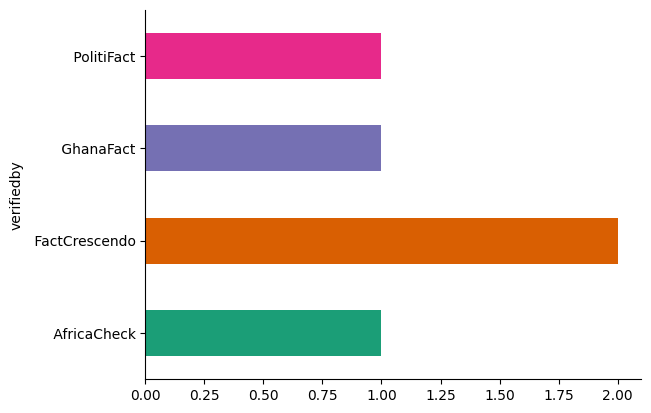

In [381]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('verifiedby').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

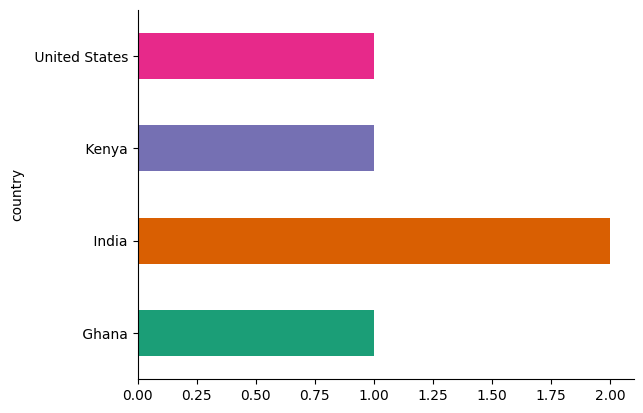

In [382]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

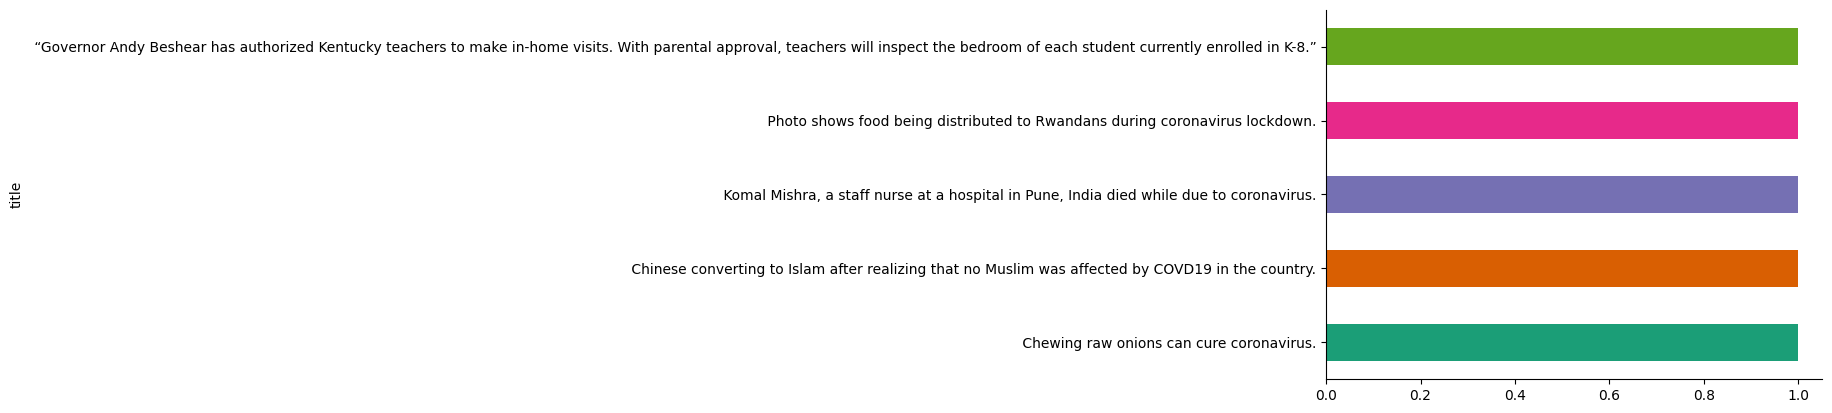

In [383]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

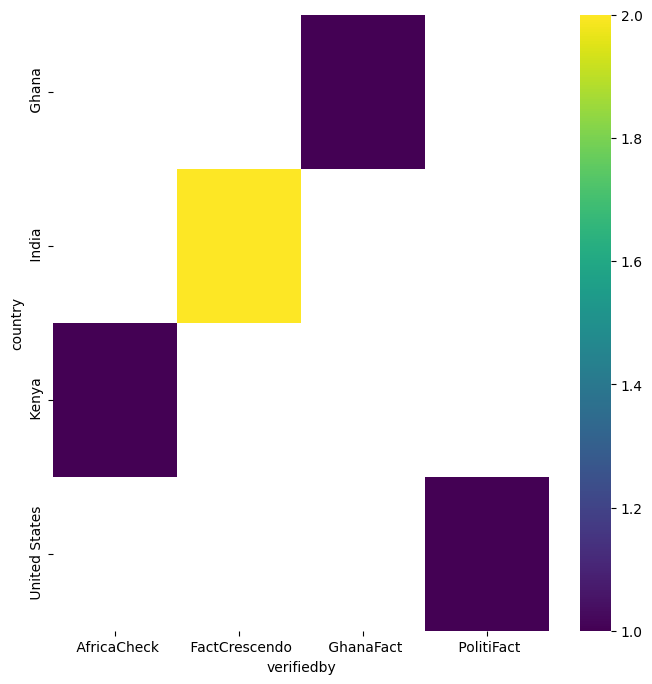

In [384]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['country'].value_counts()
    for x_label, grp in _df_8.groupby('verifiedby')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('verifiedby')
_ = plt.ylabel('country')

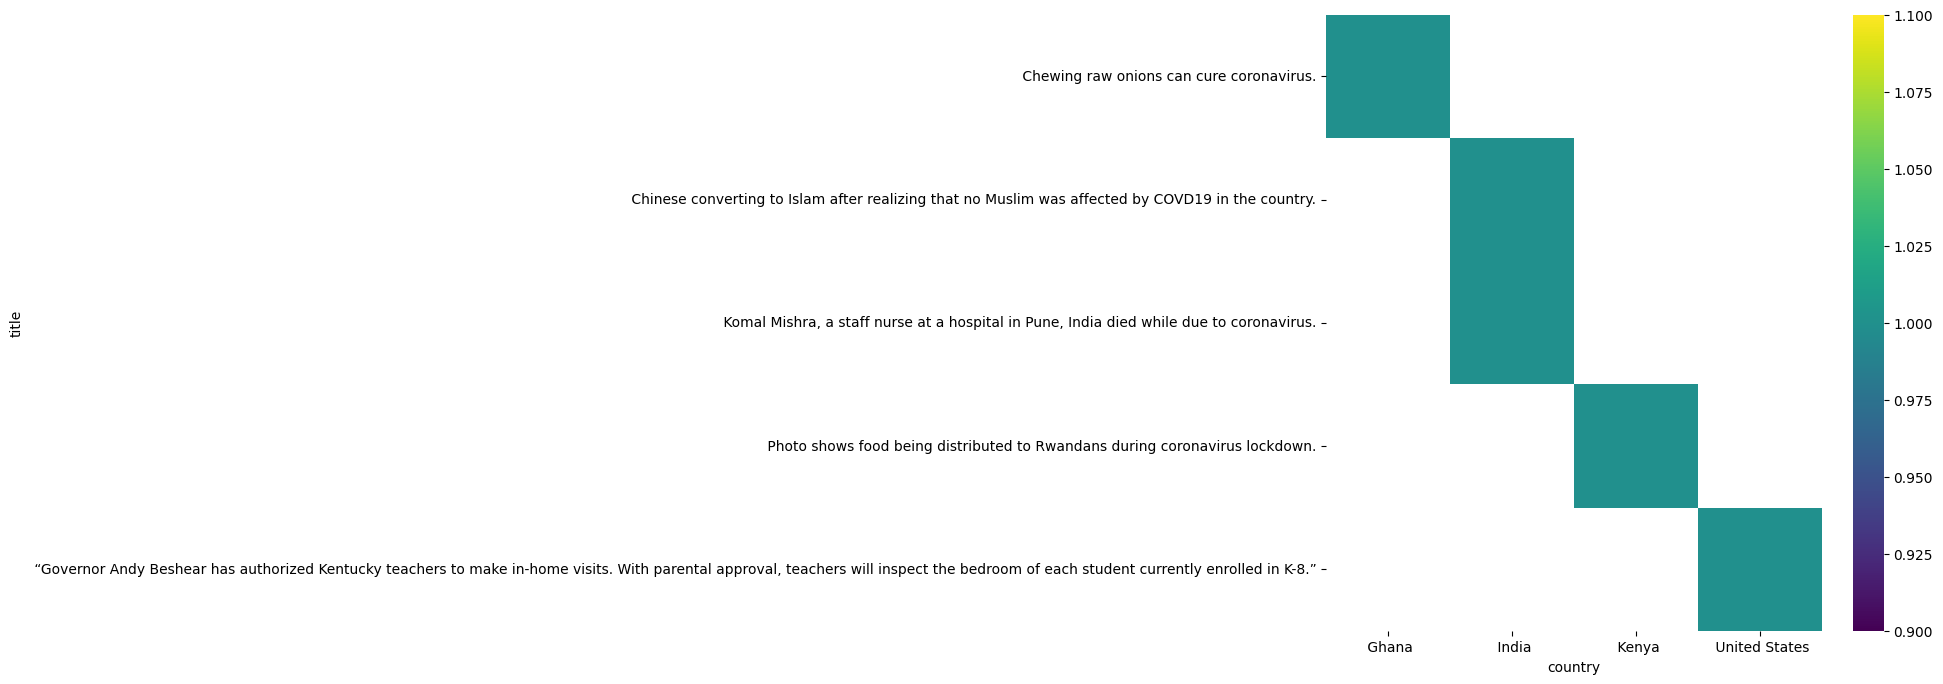

In [385]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_9.groupby('country')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('country')
_ = plt.ylabel('title')

In [386]:
# dealing with missing values in the country column
column_with_missing_values = 'country'
missing_indices = classification_df[classification_df[column_with_missing_values].isnull()].index
unique_categories = classification_df[column_with_missing_values].unique()
classification_df.loc[missing_indices, column_with_missing_values] = np.random.choice(unique_categories, len(missing_indices))
print(classification_df[column_with_missing_values].isnull().sum())

1


In [387]:
classification_df.isnull().sum()

verifiedby           0
country              1
title                0
content_text         0
published_date       0
ref_source           0
category          2167
lang                 0
class                0
dtype: int64

In [388]:
# dealing with missing values in the category column
column_with_missing_values_one = 'category'
missing_indices = classification_df[classification_df[column_with_missing_values_one].isnull()].index
unique_categories = classification_df[column_with_missing_values_one].unique()
classification_df.loc[missing_indices, column_with_missing_values_one] = np.random.choice(unique_categories, len(missing_indices))


In [389]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020/02/20,poynter,Conspiracy Theories,en,false
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020/04/29,poynter,Entertainment & Media,en,false
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020/03/30,poynter,Prophecies and Predictions,en,false
19,GhanaFact,Ghana,Chewing raw onions can cure coronavirus.,"Source: Unknown, Verdict: False, Researched by...",2020/05/29,poynter,NaN,en,false
24,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020/04/22,poynter,Trump and the Pandemic II,en,false


In [390]:
# checking for null values
classification_df.isnull().sum()

verifiedby          0
country             1
title               0
content_text        0
published_date      0
ref_source          0
category          150
lang                0
class               0
dtype: int64

In [391]:
# dropping the existing null values in the classification_df dataframe
classification_df.dropna(inplace=True)

In [392]:
#checking for null values
classification_df.isnull().sum()

verifiedby        0
country           0
title             0
content_text      0
published_date    0
ref_source        0
category          0
lang              0
class             0
dtype: int64

In [393]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020/02/20,poynter,Conspiracy Theories,en,false
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020/04/29,poynter,Entertainment & Media,en,false
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020/03/30,poynter,Prophecies and Predictions,en,false
24,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020/04/22,poynter,Trump and the Pandemic II,en,false
27,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020/05/08,poynter,Prophecies and Predictions,en,false


In [394]:
# normalizing published_date feature to get same date format for all values in the published_date column
classification_df['published_date'] =  pd.to_datetime(classification_df['published_date']).dt.normalize()

In [395]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class
2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020-02-20,poynter,Conspiracy Theories,en,false
8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020-04-29,poynter,Entertainment & Media,en,false
9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020-03-30,poynter,Prophecies and Predictions,en,false
24,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020-04-22,poynter,Trump and the Pandemic II,en,false
27,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020-05-08,poynter,Prophecies and Predictions,en,false


In [396]:
classification_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 2 to 6901
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   verifiedby      2149 non-null   object        
 1   country         2149 non-null   object        
 2   title           2149 non-null   object        
 3   content_text    2149 non-null   object        
 4   published_date  2149 non-null   datetime64[ns]
 5   ref_source      2149 non-null   object        
 6   category        2149 non-null   object        
 7   lang            2149 non-null   object        
 8   class           2149 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 167.9+ KB


In [397]:
#remove special characters and punctuation
classification_df['clean_news'] = classification_df['content_text'].str.lower()
classification_df['clean_news']

2       the fact behind every news!, ever since the wo...
8       more info, trying to focus on school work at h...
9       a photo of hundreds of neat piles of bedding a...
24      the fact behind every news!, a photo of a youn...
27      more info, this news broadcast gave no evidenc...
                              ...                        
6886    claim, "as the world is making attempts to fig...
6888    the two-minute 11-second video shows a man wea...
6894    below is a screenshot of the misleading post:,...
6899    the claims suggesting hospitals are overreport...
6901    read more, inhaling salt water steam is not an...
Name: clean_news, Length: 2149, dtype: object

str.lower() - converts all characters to lower case

In [398]:
classification_df.shape

(2149, 10)

In [399]:
classification_df.reset_index(inplace = True)

In [400]:
classification_df.head()

,index,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class,clean_news
0,2,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020-02-20,poynter,Conspiracy Theories,en,false,"the fact behind every news!, ever since the wo..."
1,8,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020-04-29,poynter,Entertainment & Media,en,false,"more info, trying to focus on school work at h..."
2,9,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020-03-30,poynter,Prophecies and Predictions,en,false,a photo of hundreds of neat piles of bedding a...
3,24,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020-04-22,poynter,Trump and the Pandemic II,en,false,"the fact behind every news!, a photo of a youn..."
4,27,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020-05-08,poynter,Prophecies and Predictions,en,false,"more info, this news broadcast gave no evidenc..."


In [401]:
classification_df.drop('index', axis = 1, inplace = True)

In [402]:

classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class,clean_news
0,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020-02-20,poynter,Conspiracy Theories,en,false,"the fact behind every news!, ever since the wo..."
1,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020-04-29,poynter,Entertainment & Media,en,false,"more info, trying to focus on school work at h..."
2,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020-03-30,poynter,Prophecies and Predictions,en,false,a photo of hundreds of neat piles of bedding a...
3,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020-04-22,poynter,Trump and the Pandemic II,en,false,"the fact behind every news!, a photo of a youn..."
4,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020-05-08,poynter,Prophecies and Predictions,en,false,"more info, this news broadcast gave no evidenc..."


In [403]:
## converting true and false values to numbers, true = 1 and false = 0 and creating column label with these values

classification_df['label'] = classification_df['class'].apply(lambda x:1 if x == 'true' else 0)

In [404]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,class,clean_news,label
0,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020-02-20,poynter,Conspiracy Theories,en,false,"the fact behind every news!, ever since the wo...",0
1,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020-04-29,poynter,Entertainment & Media,en,false,"more info, trying to focus on school work at h...",0
2,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020-03-30,poynter,Prophecies and Predictions,en,false,a photo of hundreds of neat piles of bedding a...,0
3,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020-04-22,poynter,Trump and the Pandemic II,en,false,"the fact behind every news!, a photo of a youn...",0
4,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020-05-08,poynter,Prophecies and Predictions,en,false,"more info, this news broadcast gave no evidenc...",0


In [405]:
classification_df['label'].value_counts()

0    2115
1      34
Name: label, dtype: int64

In [406]:
# dropping class column
classification_df.drop('class', axis = 1, inplace = True)

In [407]:
classification_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,clean_news,label
0,FactCrescendo,India,Chinese converting to Islam after realizing t...,"The fact behind every news!, Ever since the Wo...",2020-02-20,poynter,Conspiracy Theories,en,"the fact behind every news!, ever since the wo...",0
1,PolitiFact,United States,“Governor Andy Beshear has authorized Kentuck...,"More Info, Trying to focus on school work at h...",2020-04-29,poynter,Entertainment & Media,en,"more info, trying to focus on school work at h...",0
2,AfricaCheck,Kenya,Photo shows food being distributed to Rwandan...,A photo of hundreds of neat piles of bedding a...,2020-03-30,poynter,Prophecies and Predictions,en,a photo of hundreds of neat piles of bedding a...,0
3,FactCrescendo,India,"Komal Mishra, a staff nurse at a hospital in ...","The fact behind every news!, A photo of a youn...",2020-04-22,poynter,Trump and the Pandemic II,en,"the fact behind every news!, a photo of a youn...",0
4,PolitiFact,United States,“The mainstream media pretended there was a d...,"More Info, This news broadcast gave no evidenc...",2020-05-08,poynter,Prophecies and Predictions,en,"more info, this news broadcast gave no evidenc...",0


In [343]:
#cl_df = classification_df.sample(frac=1)
#cl_df.reset_index(inplace=True)
#cl_df.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='label', ylabel='count'>

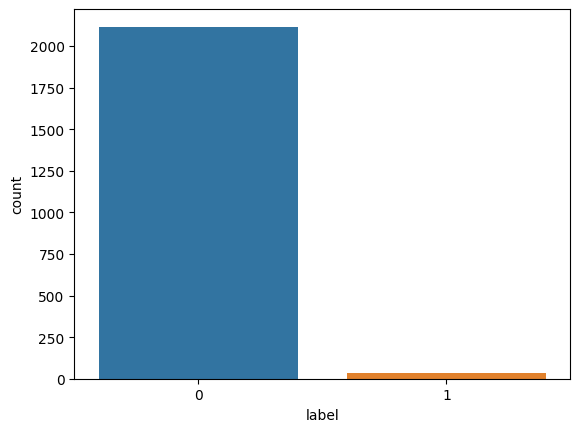

In [408]:
# creating count plot for the class1 colulmn to visualize category count
sns.countplot(data=cl_df,
              x='label',
              order=cl_df['label'].value_counts().index)

Now we proceed in removing the punctuations and special characters



In [409]:
cl_df['clean_news'] = cl_df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
cl_df['clean_news'] = cl_df['clean_news'].str.replace('\n', '')
cl_df['clean_news'] = cl_df['clean_news'].str.replace('\s+', ' ')
cl_df['clean_news']

0       claim video tablighi jamaat member roaming nak...
1       government oklahoma planning detain people unl...
2       59 people died pastor gave dettol drink suppos...
3       screenshot misleading video videos indonesianl...
4       recipes diets persistent medical myths covid19...
                              ...                        
2144    verdict false image created using news chyron ...
2145    info trying focus school work home pandemic di...
2146    claim japans nobel prize winning professor med...
2147    viral video one spot swat team hazmat suits fo...
2148    screenshot misleading post supermarket referre...
Name: clean_news, Length: 2149, dtype: object

All special characters and punctuations are removed

Escape characters are removed

Extra spaces are removed

In [410]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [411]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
cl_df['clean_news'] = cl_df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
cl_df.head()

,verifiedby,country,title,content_text,published_date,ref_source,category,lang,clean_news,label
0,Factly,India,Video of a Tablighi Jamaat member roaming nak...,Claim: Video of a Tablighi Jamaat member roami...,2020-04-08,poynter,Viral Videos,en,claim video tablighi jamaat member roaming nak...,0
1,snopes,"Australia,Spain",Are the Unvaccinated Being Forcibly Rounded up...,['The government in Oklahoma is planning to de...,2020-05-15,snopes,Conspiracy Theories,en,government oklahoma planning detain people unl...,0
2,snopes,"Kenya, Gabon, India",Did 59 People Die After Pastor Gave Them Detto...,['Some 59 people died after a pastor gave them...,2020-05-26,snopes,Prevention and Treatments II,en,59 people died pastor gave dettol drink suppos...,0
3,AFP,Indonesia,A video has been viewed tens of thousands of ...,Below is a screenshot of the misleading video:...,2020-03-29,poynter,Viral Videos,en,screenshot misleading video videos indonesianl...,0
4,LeadStories,United States,Israeli recipe for lemon and bicarbonate drin...,Recipes and diets have been persistent medical...,2020-04-02,poynter,Business and Industry,en,recipes diets persistent medical myths covid19...,0


Stop words are meaningless information, removing them simplifies the text data for good feature extraction

Stop words are removed from text by splitting the original text and comparing with the STOPWORDS list

## Exploratory Data Analysis


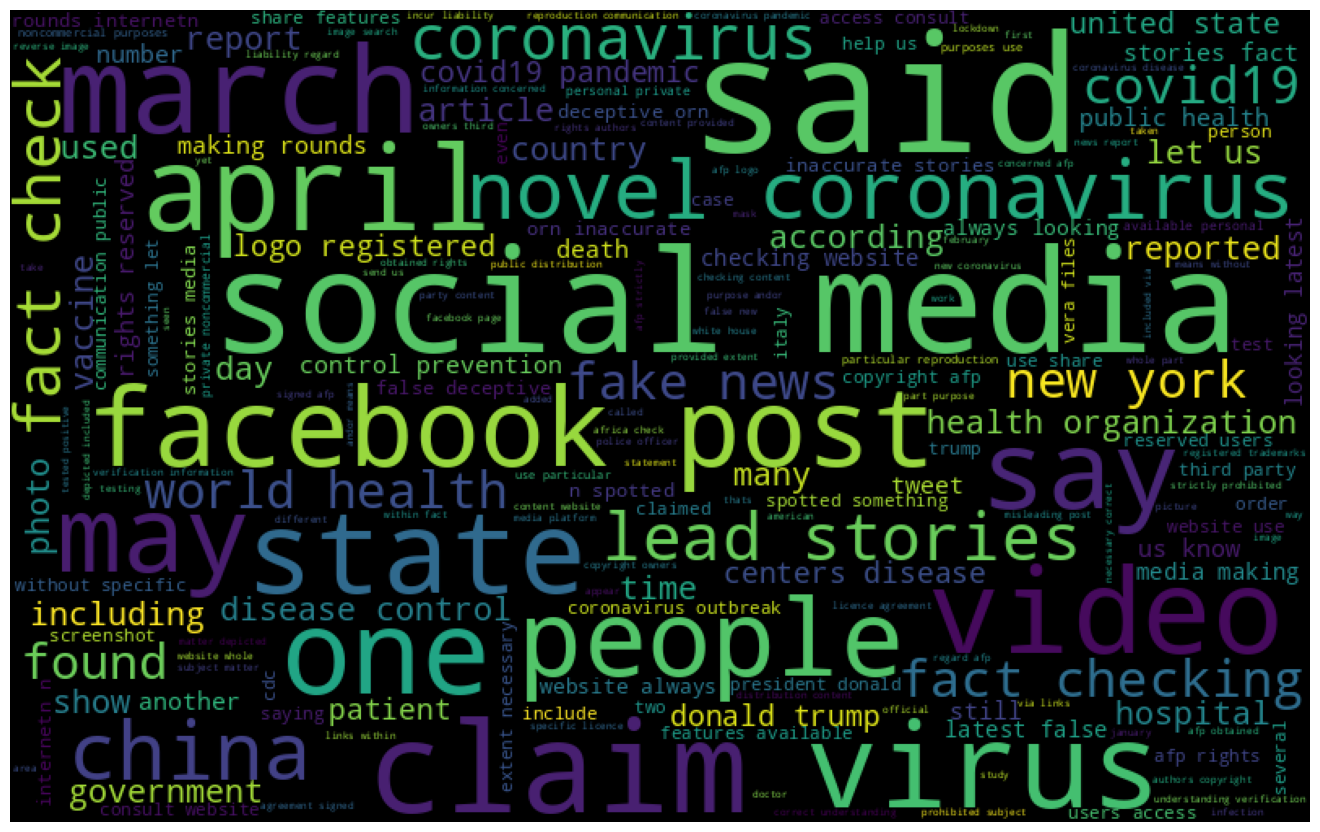

In [412]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in cl_df['clean_news']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(13, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Concatenation of all the sentences from clean_news column

The most frequent words are larger and less frequent words are smaller

Visualization of frequent words from true and false news

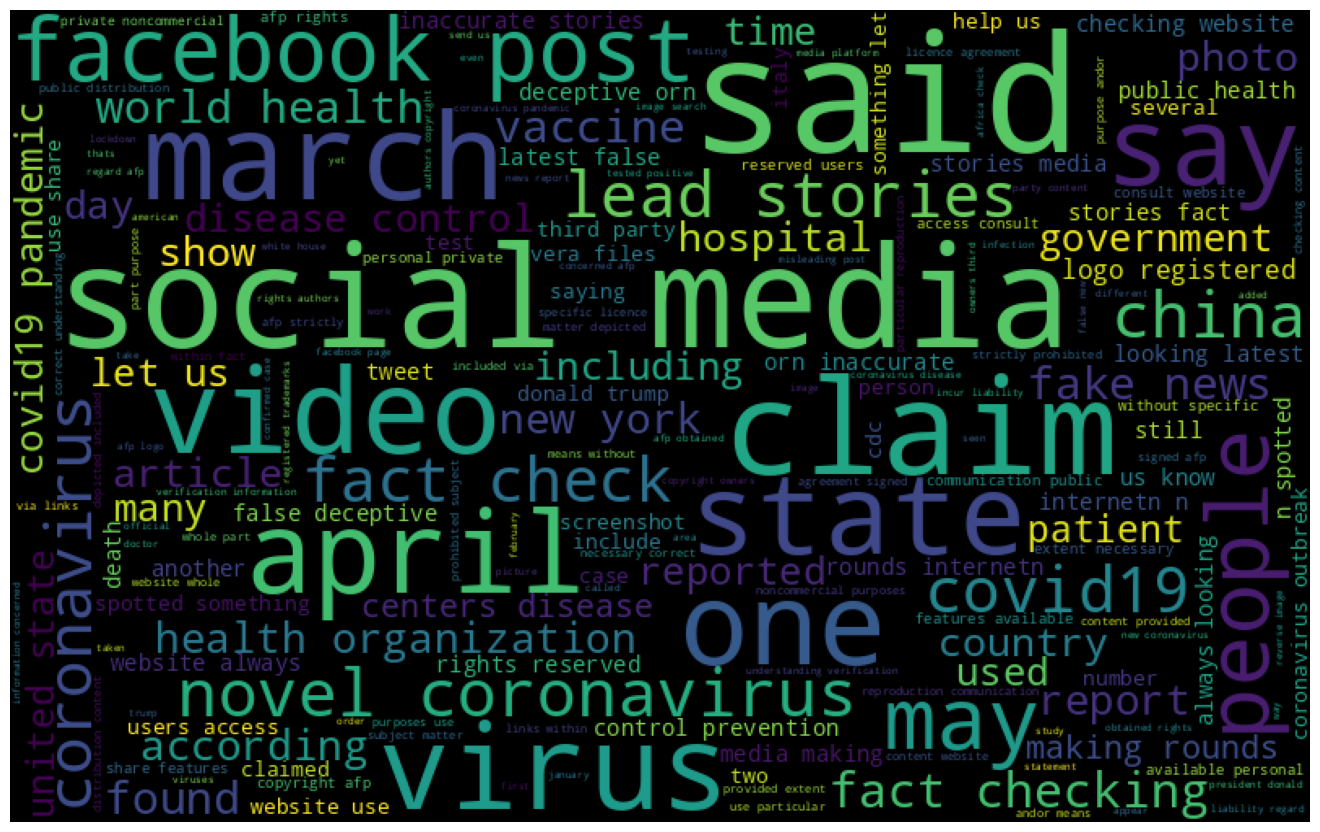

In [413]:
all_words = " ".join([sentence for sentence in cl_df['clean_news'][cl_df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(13, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Concatenation of sentences of genuine news only

Visualization of most frequent words of false news

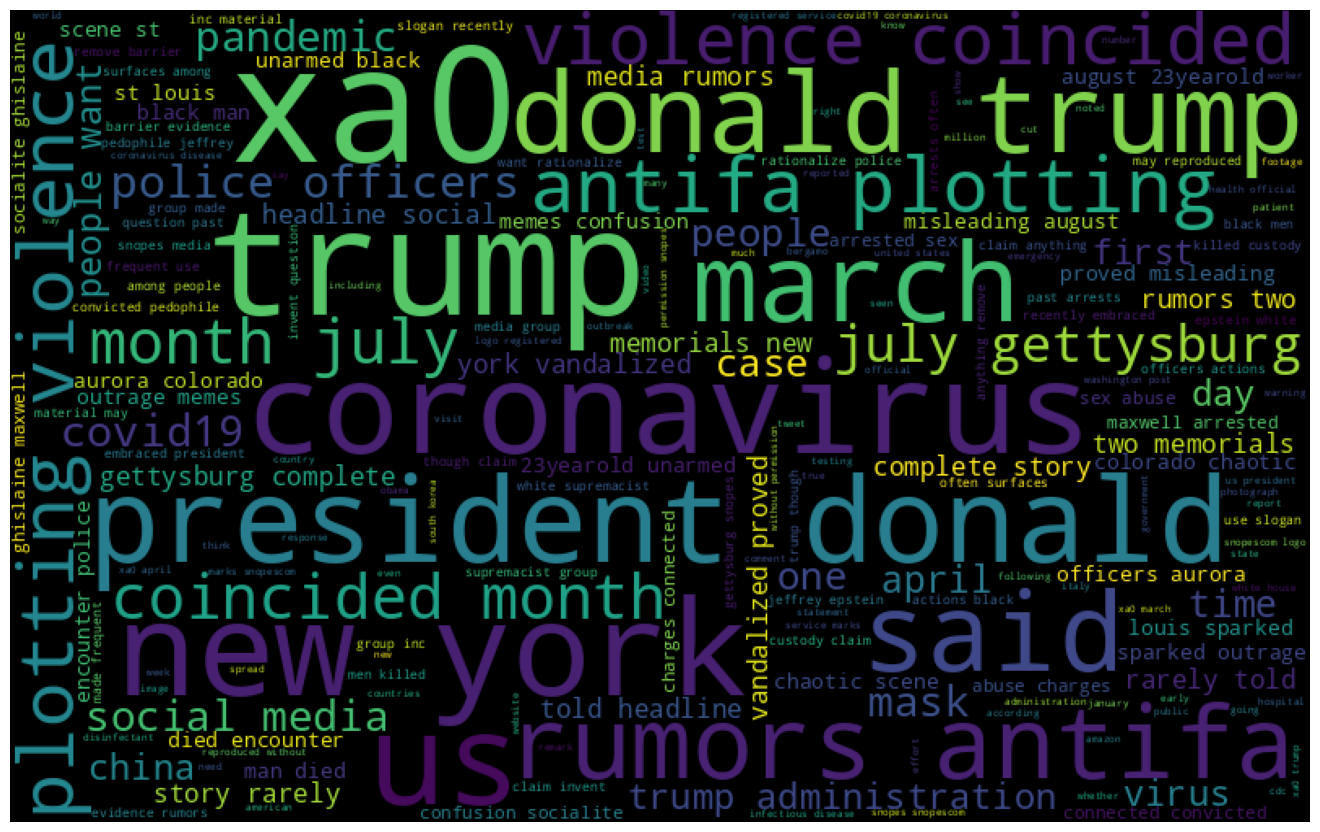

In [414]:
all_words = " ".join([sentence for sentence in cl_df['clean_news'][cl_df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(13, 9), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Concatenation of sentences of genuine news only

Visualization of most frequent words of true news

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

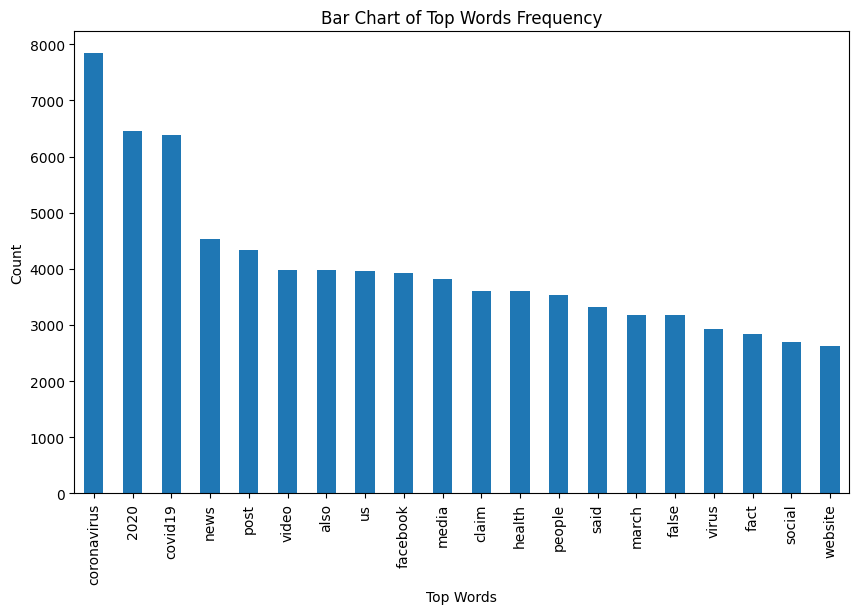

In [415]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(cl_df['clean_news'], 20)
cl_df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

cl_df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)


## Create Word Embeddings


In [416]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Tokenizer - used for loading the text and convert them into a token

pad_sequences - used for equal distribution of words in sentences filling the remaining spaces with zeros

In [417]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cl_df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

40579

Returns all unique words as tokens

vocab_size returns the total number of unique words from the data

In [418]:
# padding data
sequences = tokenizer.texts_to_sequences(cl_df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

Padding the data equalizes the length of all sentences



In [419]:
#Downloading Glove Embedding File
!wget http://nlp.stanford.edu/data/glove.6B.zip


--2023-10-28 14:28:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-10-28 14:28:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-10-28 14:28:05--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.3’

gl

In [420]:
!apt install unzip
!unzip "glove.6B.zip.3"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
Archive:  glove.6B.zip.3
replace glove.6B.50d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.200d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace glove.6B.300d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [421]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
         values = line.split()
         word = values[0]
         coefs = np.asarray(values[1:], dtype='float32')
         embedding_index[word] = coefs

Glove embedding dictionary contains vectors for words in 100 dimensions, mainly all words from the dictionary

In [422]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
         embedding_matrix[i] = embedding_vector

In [423]:
embedding_matrix[1]


array([-0.052436  ,  0.55505002,  0.29279   , -0.47082999, -0.18287   ,
       -0.29148   ,  0.25308999, -1.0467    , -0.28669   , -0.21374001,
       -0.66499001, -0.014443  ,  0.63795   ,  0.063843  ,  0.070924  ,
        0.89258999, -0.74211001,  0.065924  ,  0.32765001, -0.53355002,
        0.75094998, -0.45789999, -0.63651001, -0.73523003,  0.14758   ,
        0.29043999,  0.45958   ,  0.18154   , -1.10870004,  0.36783999,
        0.21795   ,  0.60714   ,  0.25808999,  0.39442   ,  0.17550001,
       -0.73556   ,  0.42032999,  0.11904   , -0.22468001, -0.50559002,
       -1.1336    ,  0.53359997,  0.74816   , -0.47233   ,  0.94239998,
        0.7913    ,  0.60378999,  0.73921001,  0.085797  ,  0.76314002,
       -0.04212   ,  0.70365   , -0.30256999, -0.18987   , -0.72776002,
        0.39377999, -0.54284   , -0.15922   , -0.52427   ,  0.37931001,
       -0.30395001,  1.08959997,  0.018049  ,  0.40322   ,  0.22451   ,
        0.36355001, -0.9425    ,  0.23614   ,  0.21401   , -0.74

Vectors in the embedding matrix as float32 data type

The 100 values represents a single word

## Input Split

In [424]:
padded_seq[1]


array([   60,  4245,  2579, 10078,    13,  1181,   160,  1489,  1015,
       15910,     2,     9,    92,   900,   394, 15911,     6,   157,
         241,    60, 15912,  4009,  3904,  7230,    13,     6,   568,
         574,   102,  4010,  2347,   661,  4011,  4245,   861,   901,
         383, 13117,   704,     3,     1,    32,    35,  1530,    77,
        4245,     6,   197,   138,  1044,  1746,  5222,  7741,  7231,
        1519,   418,  2656,    77, 21501,     6,  7741,  2845,    60,
       21502,  3905,  2246,  7741,    14,     6,    85,    77, 13118,
         200,   133,  1366,  1490,  1804,   648, 11301, 21503,   822,
        1844,   625,    22,  3217,  1406,  3906,    23,   121,   410,
        1927,   948,  2348,  1927,  7741,    14,    61,  1859,  3804,
        5223,  5924,  9124,   125,   989,  4835,  2546,    72,  4836,
         422,  1049,    28,   955,   215,   851,  5924,   666,  7742,
        5924,   260,   493,  4837,   470,   392,   272,  1016,   440,
        3522,   955,

Visualization of word index from the padded sequence

Good example viewing a padded sentence, remaining spaces filled with zero to match the max length



## Now we proceed in splitting the data for training



In [425]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, cl_df['label'], test_size=0.20, random_state=42, stratify=cl_df['label'])

80% data split for training and remaining 20% for testing

Stratify will equally distribute the samples for train and test



## SMOTE Analysis for Creating Balanced Label

In [426]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

In [427]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_test_sm, y_test_sm = smt.fit_resample(x_test, y_test)

## Model Training


In [428]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

# model = Sequential([
#     Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
#     Dropout(0.2),
#     LSTM(128, return_sequences=True),
#     LSTM(128),
#     Dropout(0.2),
#     Dense(512),
#     Dropout(0.2),
#     Dense(256),
#     Dense(1, activation='sigmoid')
# ])

model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

Embedding - maps the word index to the corresponding vector representation

LSTM - process sequence of data

Dense - single dimension linear layer

Use Dropout if augmentation was not applied on the data to avoid over fitting

activation='sigmoid' - used for binary classification

In [429]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         4058000   
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 4208529 (16.05 MB)
Trainable params: 150

model.compile() - compilation of the model

optimizer='adam' - automatically adjust the learning rate for the model over the no. of epochs

loss='binary_crossentropy' - loss function for binary outputs

In [430]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
7/7 [==============================] - 22s 3s/step - loss: 0.5685 - accuracy: 0.9657 - val_loss: 0.3924 - val_accuracy: 0.9837
Epoch 2/10
7/7 [==============================] - 21s 3s/step - loss: 0.1700 - accuracy: 0.9849 - val_loss: 0.1696 - val_accuracy: 0.9837
Epoch 3/10
7/7 [==============================] - 18s 3s/step - loss: 0.1237 - accuracy: 0.9849 - val_loss: 0.0933 - val_accuracy: 0.9837
Epoch 4/10
7/7 [==============================] - 18s 3s/step - loss: 0.0922 - accuracy: 0.9849 - val_loss: 0.0858 - val_accuracy: 0.9837
Epoch 5/10
7/7 [==============================] - 22s 3s/step - loss: 0.0801 - accuracy: 0.9849 - val_loss: 0.0835 - val_accuracy: 0.9837
Epoch 6/10
7/7 [==============================] - 18s 3s/step - loss: 0.0767 - accuracy: 0.9849 - val_loss: 0.0738 - val_accuracy: 0.9837
Epoch 7/10
7/7 [==============================] - 21s 3s/step - loss: 0.0701 - accuracy: 0.9849 - val_loss: 0.0703 - val_accuracy: 0.9837
Epoch 8/10
7/7 [==================

Set the no. of epochs and batch size according to the hardware specifications

Training accuracy and validation accuracy increases each iteration

Training loss and validation loss decreases each iteration

The maximum validation accuracy is 98.37

## Now we visualize the results through a plot graph



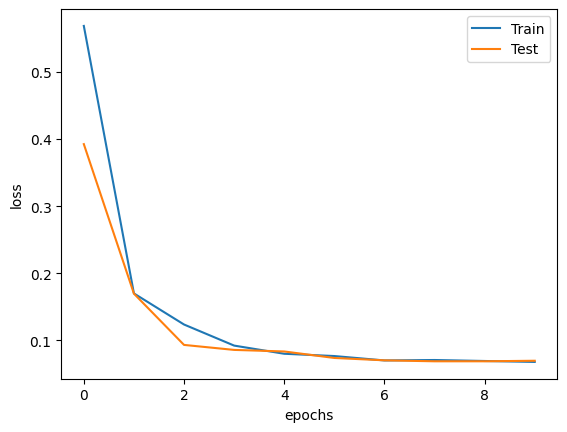

In [432]:
# visualize the results
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()

## Final Thoughts

Training the model by increasing the no. of epochs can give better and more accurate results.

Processing large amount of data can take a lot of time and system resource.

Basic deep learning model trained in a small neural network, adding new layers may improve the results.

We trained a LSTM model to predict the fake news and other models like GRU, Bi-LSTM, Transformers (BERT, T5, Xlnet, GPT etc.) can be used to improve the performance of the model.

## Final Thoughts

Training the model by increasing the no. of epochs can give better and more accurate results.

Processing large amount of data can take a lot of time and system resource.

Basic deep learning model trained in a small neural network, adding new layers may improve the results.

We can trained a LSTM model to predict the fake news and other models like GRU, Bi-LSTM, Transformers (BERT, T5, Xlnet, GPT etc.) can be used to improve the performance of the model.